# Neutral Biallelic Model

## What is our aim?
We want to observe how a gene population diversifies over time assuming mutation and recombination.
More specifically, we want to observe how the variance of the pairwise Hamming distance of the population changes.


## How will we go about it?
We will initialize a population of 'genes' (binary messages of 0s and 1s) of fixed length.
1. These genes can reproduce by recombination (with given recombination rate) with each other and the children will mutate with given mutation rate.
2. These genes will 'die' after a certain time with the probability distribution of survival with time given by a survival function. For this implementation, we will use the simplest survival function, i.e., a step function.
3. We will not implement natural selection (i.e., different fitness for different genes).
4. We will observe the mean variance of the pairwise Hamming distance as a function of the recombination rate.


## Description of the algorithm
The code starts by defining a $Gene$ class that has several properties:
1. gene_length (the length of the genetic code),
2. mutation_rate (the probability that a gene will undergo point mutation at each locus),
3. recombination_rate (the probability that two genes will recombine at a gene locus),
4. max_age (the age at which a gene is removed),
5. and growth_rate (the rate at which the population grows).

The $Gene$ class also has several methods, including
1. initialize_gene (which initializes a gene with all zeros or randomly as we require),
2. mutate (which mutates a gene),
3. recombine (which recombines two parent genes to create a child new gene),
4. and survival_function (which checks if genes are too old).

The $GeneEnsemble$ class is a subclass of $Gene$ and adds several more properties, including
1. population_size (the size of the population),
2. carrying_capacity (the maximum stable size of the population),
3. run_idx (the index of the current run),
4. and several lists to store data about the population's evolution over time.

The $GeneEnsemble$ class also has several methods, including
1. initialize_population (which initializes a population with genes according to the initialize_gene method of the $Gene$ class),
2. selection (which selects two random parents from the population for recombination),
    1. This could be modified to include a fitness function that selects parents based on their fitness.
3. and run, which
    1. runs the simulation for a certain number of generations, and
        1. calculates the variance of the pairwise Hamming distances of the population,
        2. updates the population size based on the logistic growth function,
        3. creates a new generation of children,
        4. removes old genes from the population,
        5. increment the generation counter,
    2. returns the variances of the pairwise Hamming distances over generations.

In [1]:
# Importing the libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from test11 import Gene, GeneEnsemble
from time import time   # For timing the code

In [ ]:
# Defining the parameters
gene_length = 50 # Length of the gene
mutation_rate = 0.08 # Mutation rate
max_age = 4 # Maximum age of a gene
growth_rate = 0.5 # Growth rate of the population
population_size = 100 # Initial population size
carrying_capacity = 100 # Carrying capacity of the population
num_generations = 15 # Number of generations

N = 30 # Number of recombination rates
r_rate = np.linspace(0, 0.2, N)

In [ ]:
# Starting the timer
start_time = time()

# Running the algorithm
var_hamming = []
for idx in range(N):
    # Instantiating the algorithm
    ga = GeneEnsemble(gene_length=gene_length, mutation_rate=mutation_rate, recombination_rate=r_rate[idx], max_age=max_age, growth_rate=growth_rate, population_size=population_size, carrying_capacity=carrying_capacity, run_idx=idx)
    # Running the algorithm
    var_hamming.append(ga.run(num_generations=num_generations))

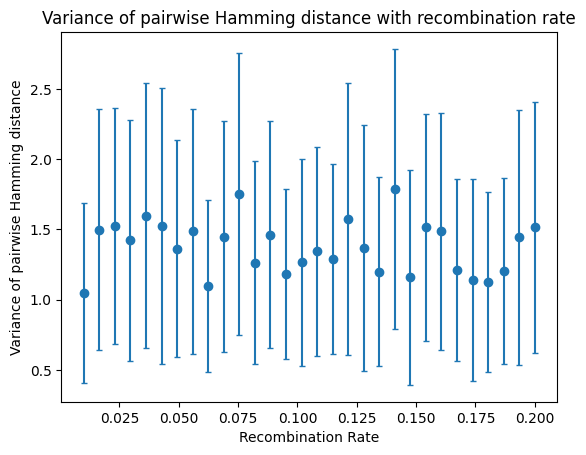

Time taken: 70.80513596534729 seconds


In [3]:
# Calculating the mean and variance of the variances
avg_var_hamming = np.mean(var_hamming, axis=1)
avg_std_var_hamming = np.sqrt(np.var(var_hamming, axis=1))

# Plotting the results with error bars
plt.errorbar(r_rate, avg_var_hamming, yerr=avg_std_var_hamming, fmt='o', capsize=2)
plt.title('Variance of pairwise Hamming distance with recombination rate')
plt.xlabel('Recombination Rate')
plt.ylabel('Variance of pairwise Hamming distance')
plt.show()

end_time = time()
print('Time taken: {} seconds'.format(end_time - start_time))